# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

2021-11-10 10:32:13.110422: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-10 10:32:13.110463: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型

In [8]:
#宣告採用序列模型
model = Sequential()

2021-11-10 10:33:44.190374: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-10 10:33:44.190459: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-10 10:33:44.190502: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (11402.pyspark3): /proc/driver/nvidia/version does not exist
2021-11-10 10:33:44.190904: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [10]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 400,906
Trainable params: 400,906
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [13]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

2021-11-10 10:36:07.585120: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2537 - accuracy: 0.9224 - val_loss: 0.1655 - val_accuracy: 0.9492
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1102 - accuracy: 0.9674 - val_loss: 0.0948 - val_accuracy: 0.9725
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0779 - accuracy: 0.9762 - val_loss: 0.0934 - val_accuracy: 0.9747
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0628 - accuracy: 0.9819 - val_loss: 0.0965 - val_accuracy: 0.9740
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0522 - accuracy: 0.9844 - val_loss: 0.1039 - val_accuracy: 0.9747
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0422 - accuracy: 0.9871 - val_loss: 0.0990 - val_accuracy: 0.9760
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0384 - accuracy: 0.9888 - val_loss: 0.1004 - val_accuracy:

# 以圖形顯示訓練過程

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [17]:
train_history.history

{'loss': [0.2537320554256439,
  0.11021896451711655,
  0.07794146239757538,
  0.06283493340015411,
  0.052158985286951065,
  0.04218456894159317,
  0.0383918471634388,
  0.03304050490260124,
  0.02859279327094555,
  0.02404610998928547],
 'accuracy': [0.9223958253860474,
  0.9674166440963745,
  0.976229190826416,
  0.9818958044052124,
  0.984416663646698,
  0.9871458411216736,
  0.9887708425521851,
  0.9900208115577698,
  0.9913125038146973,
  0.9922500252723694],
 'val_loss': [0.16547240316867828,
  0.0948224812746048,
  0.0934111550450325,
  0.0965426042675972,
  0.10394947230815887,
  0.09896472096443176,
  0.10037156194448471,
  0.1050942912697792,
  0.11866895854473114,
  0.13015392422676086],
 'val_accuracy': [0.9492499828338623,
  0.9725000262260437,
  0.9746666550636292,
  0.9739999771118164,
  0.9747499823570251,
  0.9760000109672546,
  0.9734166860580444,
  0.9767500162124634,
  0.9748333096504211,
  0.9762499928474426]}

In [15]:
show_train_history(train_history,'acc','val_acc')

KeyError: 'acc'

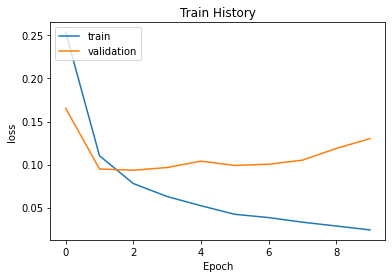

In [16]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])